# Lab 3

Hugo Yeremian - Martin Pasche

In [45]:
import Hawkes as hk
import numpy as np
import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.cm import get_cmap
import pandas as pd
from tqdm import tqdm

A Hawkes process is a simple point process model of the clustering behaviour of event occurrences. In the Hawkes process, the occurrence rate of a event at time $t$ given a history $H_t=\{t_i<t\}$ is given as

$$\lambda(t|H_t)=\mu(t) + \sum_{t_i<t} f(t-t_i)$$

where $\{t_i\}$ represent the occurrence times of events.

$\mu(t)$ and $f(\tau)$ represent a baseline function and a kernel function, respectively.

## Part I :

 - A function that simulates one path of a Hawkes process with a **generic decreasing kernel** using the **thinning algorithm**.

In [13]:
"""ArithmeticErrordef Hawkes_1D(T, lambda_0, alpha, beta):
    events = []
    t=0.0
    while t < T:
        lambda_t =  lambda_0 + sum(alpha * np.exp(-beta)*(t-ti) for ti in events)
    # time increment
    t += np.
    if t > T:
        break
"""

'ArithmeticErrordef Hawkes_1D(T, lambda_0, alpha, beta):\n    events = []\n    t=0.0\n    while t < T:\n        lambda_t =  lambda_0 + sum(alpha * np.exp(-beta)*(t-ti) for ti in events)\n    # time increment\n    t += np.\n    if t > T:\n        break\n'

Appendix : plots from the library aren't working anymore in that version of python, so corrected them.

In [14]:
def plot_N(T, itv):
    gs = gridspec.GridSpec(100, 1)

    plt.figure(figsize=(4, 5), dpi=100)
    mpl.rc('font', size=12, family='Arial')
    mpl.rc('axes', titlesize=12)
    mpl.rc('pdf', fonttype=42)

    [st, en] = itv
    n = len(T)
    x = np.hstack([st, np.repeat(T, 2), en])
    y = np.repeat(np.arange(n + 1), 2)

    plt.subplot(gs[0:10, 0])
    plt.plot(np.hstack([[t, t, np.nan] for t in T]), np.array([0, 1, np.nan] * n), 'k-', linewidth=0.5)
    plt.xticks([])
    plt.xlim(itv)
    plt.ylim([0, 1])
    plt.yticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.subplot(gs[15:100, 0])
    plt.plot(x, y, 'k-', clip_on=False)
    plt.xlim(itv)
    plt.ylim([0, n])
    plt.xlabel('time')
    plt.ylabel(r'$N(0,t)$')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

In [15]:
def plot_l(T, x, l, l_baseline):
    gs = gridspec.GridSpec(100, 1)

    plt.figure(figsize=(4, 5), dpi=100)
    mpl.rc('font', size=12, family='Arial')
    mpl.rc('axes', titlesize=12)
    mpl.rc('pdf', fonttype=42)

    l_max = l.max()
    n = len(T)

    plt.subplot(gs[0:10, 0])
    plt.plot(np.hstack([[t, t, np.nan] for t in T]), np.array([0, 1, np.nan] * n), 'k-', linewidth=0.5)
    plt.xticks([])
    plt.xlim([x[0], x[-1]])
    plt.ylim([0, 1])
    plt.yticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.subplot(gs[15:100, 0])
    plt.plot(x, l, 'k-', lw=1)
    plt.plot(x, l_baseline, 'k:', lw=1)
    plt.xlim([x[0], x[-1]])
    plt.ylim([0, l_max])
    plt.xlabel('time')
    plt.ylabel(r'$\lambda(t|H_t)$')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


In [16]:
def plot_N_enhanced(T, itv):
    plt.figure(figsize=(6, 4), dpi=120)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.2, 3], hspace=0.3)
    [st, en] = itv
    n = len(T)

    # Raster plot on top
    ax0 = plt.subplot(gs[0])
    for t in T:
        ax0.plot([t, t], [0, 1], color='dodgerblue', linewidth=1)
    ax0.set_xlim(itv)
    ax0.set_ylim([0, 1])
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title("Event Raster")
    ax0.spines[['top', 'right', 'left']].set_visible(False)

    # N(t) process
    ax1 = plt.subplot(gs[2])
    x = np.hstack([st, np.repeat(T, 2), en])
    y = np.repeat(np.arange(n + 1), 2)
    ax1.plot(x, y, '-', color='black', linewidth=1.2)
    ax1.set_xlim(itv)
    ax1.set_ylim([0, n])
    ax1.set_xlabel('Time')
    ax1.set_ylabel(r'$N(0,t)$')
    ax1.grid(True, linestyle=':', linewidth=0.5)
    ax1.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()

def plot_l_enhanced(T, x, l, l_baseline):
    plt.figure(figsize=(6, 4), dpi=120)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.2, 3], hspace=0.3)
    l_max = max(l.max(), l_baseline.max())

    # Raster plot
    ax0 = plt.subplot(gs[0])
    for t in T:
        ax0.plot([t, t], [0, 1], color='dodgerblue', linewidth=1)
    ax0.set_xlim([x[0], x[-1]])
    ax0.set_ylim([0, 1])
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title("Event Raster")
    ax0.spines[['top', 'right', 'left']].set_visible(False)

    # Intensity plot
    ax1 = plt.subplot(gs[2])
    ax1.plot(x, l, label=r'$\lambda(t|H_t)$', color='black', lw=1.5)
    ax1.plot(x, l_baseline, label='Baseline', linestyle='--', color='gray', lw=1)
    ax1.set_xlim([x[0], x[-1]])
    ax1.set_ylim([0, l_max * 1.05])
    ax1.set_xlabel('Time')
    ax1.set_ylabel(r'$\lambda(t|H_t)$')
    ax1.grid(True, linestyle=':', linewidth=0.5)
    ax1.legend(frameon=False)
    ax1.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()

Number of events: 16
Estimated parameters: {'mu': np.float64(0.10216807520444647), 'alpha': np.float64(0.36739409646242127), 'beta': np.float64(1.1335241091408015)}

1.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


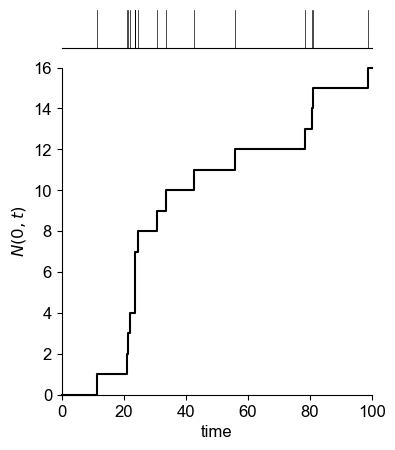

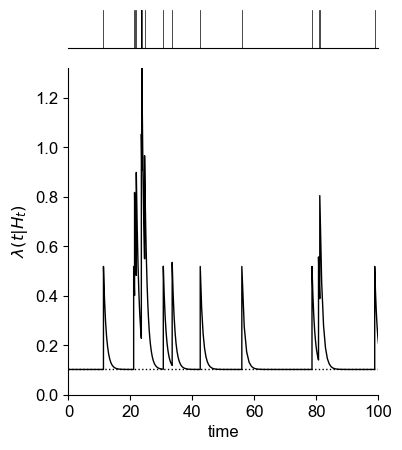

In [17]:
# set of parameters as defined in the introduction
para = {"mu": 0.1, "alpha": 0.4, "beta": 1.0}
itv = [0, 100]

h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print("Number of events:", len(T))

# Step 3: Estimate parameters from simulated data
h2 = hk.estimator().set_kernel('exp').set_baseline('const')
h2.fit(T, itv)
print("Estimated parameters:", h2.para)

# Timing the fit
print()
%timeit -n1 -r1 h2.fit(T, itv)

# Step 4: Plotting
plot_N(T, itv)

# Assuming h2 has .tl() which returns time grid, intensity, and baseline
t, l, l_baseline = h2.tl()
plot_l(T, t, l, l_baseline)


- A function that simulates one path of a Hawkes process with a **generic decreasing kernel** using the **branching algorithm.**

/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/737449898.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


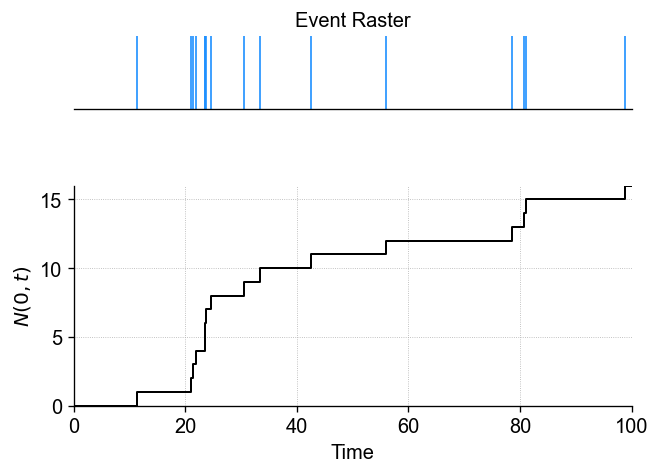

/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/737449898.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


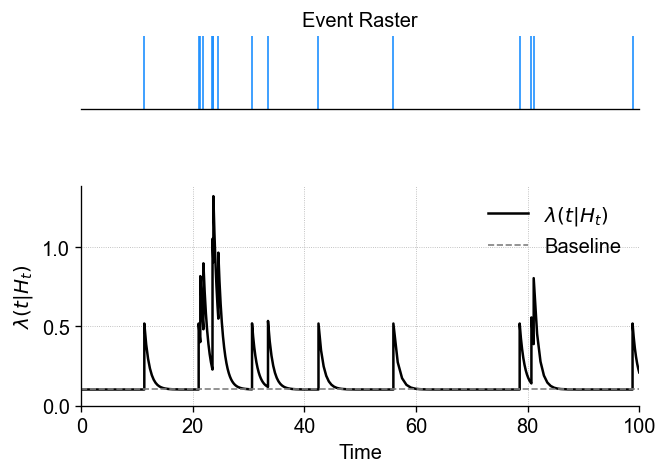

In [18]:
plot_N_enhanced(T, itv)
t, l, l_baseline = h2.tl()
plot_l_enhanced(T, t, l, l_baseline)

Thinning algorithm simulates a non-homogeneous Poisson process over time.

Branching algorithm treats the Hawkes process as a Poisson cluster process:

- Immigrants arrive via a Poisson process (baseline rate μ).

- Each immigrant gives rise to offspring (events) via a triggering kernel, and those offspring can trigger more, recursively.

In [ ]:
# first step
def generate_immigrants(lmbda_0, Tmax):
    times = []
    t = 0
    while True:
        t += np.random.exponential(1.0 / lmbda_0)
        if t > Tmax:
            break
        times.append(t)
    return np.array(times)

# second step
def generate_offspring(parent_time, kernel_func, kernel_max, Tmax):
    offspring = []
    t = parent_time
    while True:
        t += np.random.exponential(1.0 / kernel_max)
        if t > Tmax:
            break
        if np.random.rand() < kernel_func(t - parent_time) / kernel_max:
            offspring.append(t)
    return offspring

def simulate_hawkes_branching(lmbda_0, kernel_func, kernel_max, Tmax):
    """
    Simulate Hawkes process via branching algorithm, with generation tracking.
    
    Returns:
        events : np.ndarray
        generations : np.ndarray
    """
    immigrants = generate_immigrants(lmbda_0, Tmax)
    events = list(immigrants)
    generations = [0] * len(immigrants)
    queue = [(t, 0) for t in immigrants]  # (event_time, generation)

    while queue:
        parent_time, parent_gen = queue.pop()
        children = generate_offspring(parent_time, kernel_func, kernel_max, Tmax)
        events.extend(children)
        generations.extend([parent_gen + 1] * len(children))
        queue.extend([(child, parent_gen + 1) for child in children])

    # Sort events and match generations accordingly
    sorted_idx = np.argsort(events)
    events = np.array(events)[sorted_idx]
    generations = np.array(generations)[sorted_idx]

    return events, generations


In [20]:
# Define exponential kernel: ν(t) = α * β * exp(-βt)
alpha = 0.5
beta = 2.0
nu = lambda t: alpha * beta * np.exp(-beta * t)
nu_max = alpha * beta

events, generations = simulate_hawkes_branching(
    lmbda_0=0.2,
    kernel_func=nu,
    kernel_max=nu_max,
    Tmax=100
)
print("Generated", len(events), "events.")

Generated 37 events.


In [21]:
def plot_branching_colored(T, generations, itv):
    """
    Plot event raster and N(t) with generation color coding.
    
    Parameters:
        T : array-like
            Event times.
        generations : array-like
            Same length as T. Generation number (0 = immigrant, 1 = first-gen, etc.).
        itv : tuple
            Time interval (start, end).
    """
    T = np.array(T)
    generations = np.array(generations)
    [st, en] = itv
    n = len(T)

    # Normalize generations to colors
    gen_unique = np.unique(generations)
    cmap = get_cmap("viridis", len(gen_unique))
    color_dict = {g: cmap(i) for i, g in enumerate(gen_unique)}

    plt.figure(figsize=(6, 4), dpi=120)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.2, 3], hspace=0.3)

    # Raster plot with generations
    ax0 = plt.subplot(gs[0])
    for t, g in zip(T, generations):
        ax0.plot([t, t], [0, 1], color=color_dict[g], linewidth=1)
    ax0.set_xlim(itv)
    ax0.set_ylim([0, 1])
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title("Event Raster by Generation")
    ax0.spines[['top', 'right', 'left']].set_visible(False)

    # N(t) plot
    ax1 = plt.subplot(gs[2])
    x = np.hstack([st, np.repeat(T, 2), en])
    y = np.repeat(np.arange(n + 1), 2)
    ax1.plot(x, y, '-', color='black', linewidth=1.2)
    ax1.set_xlim(itv)
    ax1.set_ylim([0, n])
    ax1.set_xlabel('Time')
    ax1.set_ylabel(r'$N(0,t)$')
    ax1.grid(True, linestyle=':', linewidth=0.5)
    ax1.spines[['top', 'right']].set_visible(False)

    # Legend
    handles = [plt.Line2D([0], [0], color=color_dict[g], lw=2, label=f'Gen {g}') for g in gen_unique]
    ax1.legend(handles=handles, title="Generations", frameon=False)

    plt.tight_layout()
    plt.show()


/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/4004536034.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", len(gen_unique))
/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/4004536034.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


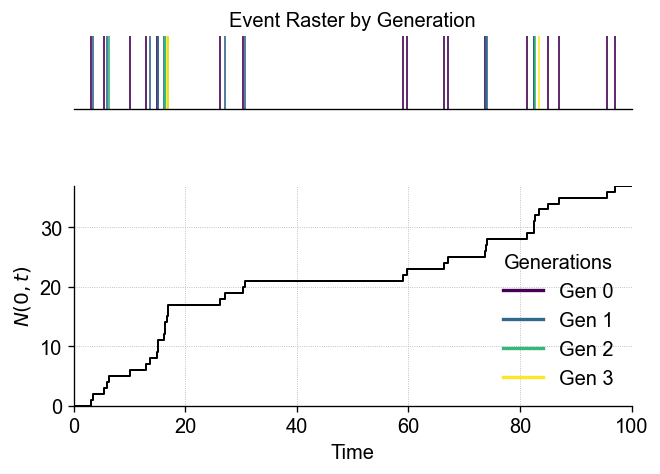

In [22]:
plot_branching_colored(events, generations, itv=[0, 100])

In [24]:
def compute_intensity_from_events(T, kernel_func, lambda_0, t_grid):
    """
    Reconstruct intensity λ(t) over time grid using branching process output.
    
    Parameters:
        T : array of event times
        kernel_func : function ν(t)
        lambda_0 : float, baseline intensity
        t_grid : np.array of time points

    Returns:
        l : np.array, total intensity λ(t)
        l_baseline : np.array, constant baseline over time
    """
    l = np.full_like(t_grid, fill_value=lambda_0, dtype=float)

    for ti in T:
        mask = t_grid > ti
        l[mask] += kernel_func(t_grid[mask] - ti)

    return l, np.full_like(t_grid, lambda_0)


/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/737449898.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


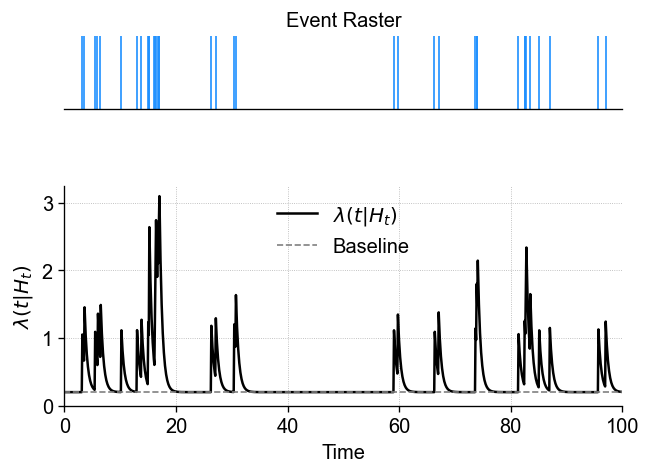

In [25]:
# 2. Build a time grid
t_grid = np.linspace(0, 100, 1000)

# 3. Recompute intensity
l, l_baseline = compute_intensity_from_events(events, kernel_func=nu, lambda_0=0.2, t_grid=t_grid)

# 4. Plot
plot_l_enhanced(events, t_grid, l, l_baseline)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.cm import get_cmap

def plot_l_colored_by_generation(T, generations, x, l, l_baseline):
    """
    Plot raster + intensity for branching Hawkes process, colored by generation.

    Parameters:
        T : list or np.ndarray
            Event times.
        generations : list or np.ndarray
            Generation number for each event (same length as T).
        x : np.ndarray
            Time grid for intensity.
        l : np.ndarray
            Reconstructed intensity λ(t).
        l_baseline : np.ndarray
            Baseline intensity (e.g., constant λ₀).
    """
    T = np.array(T)
    generations = np.array(generations)
    l_max = max(l.max(), l_baseline.max())
    gen_unique = np.unique(generations)
    cmap = get_cmap("viridis", len(gen_unique))
    color_dict = {g: cmap(i) for i, g in enumerate(gen_unique)}

    plt.figure(figsize=(6, 4), dpi=120)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.2, 3], hspace=0.3)

    # Top: Raster with generation colors
    ax0 = plt.subplot(gs[0])
    for t, g in zip(T, generations):
        ax0.plot([t, t], [0, 1], color=color_dict[g], linewidth=1)
    ax0.set_xlim([x[0], x[-1]])
    ax0.set_ylim([0, 1])
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title("Event Raster by Generation")
    ax0.spines[['top', 'right', 'left']].set_visible(False)

    # Bottom: Intensity curve
    ax1 = plt.subplot(gs[2])
    ax1.plot(x, l, label=r'$\lambda(t|H_t)$', color='black', lw=1.5)
    ax1.plot(x, l_baseline, label='Baseline', linestyle='--', color='gray', lw=1)
    ax1.set_xlim([x[0], x[-1]])
    ax1.set_ylim([0, l_max * 1.05])
    ax1.set_xlabel('Time')
    ax1.set_ylabel(r'$\lambda(t|H_t)$')
    ax1.grid(True, linestyle=':', linewidth=0.5)
    ax1.legend(frameon=False)
    ax1.spines[['top', 'right']].set_visible(False)

    # Legend for generations
    handles = [plt.Line2D([0], [0], color=color_dict[g], lw=2, label=f'Gen {g}') for g in gen_unique]
    ax1.legend(handles=handles, title="Generations", frameon=False)

    plt.tight_layout()
    plt.show()


/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/3429791429.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", len(gen_unique))
/var/folders/nd/lbp9nypd0l328jm0b27jr8c00000gn/T/ipykernel_70075/3429791429.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


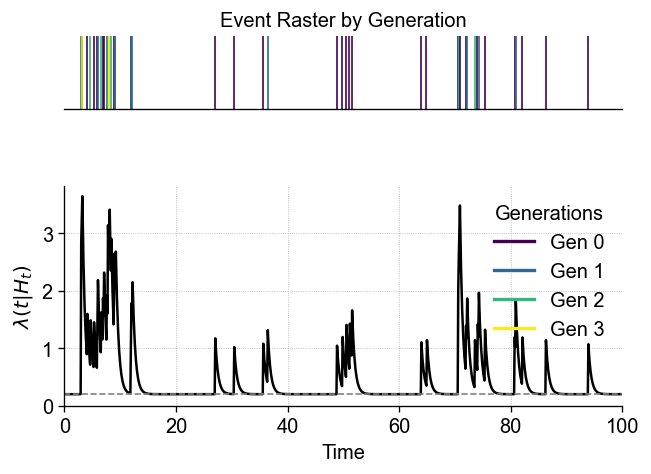

In [28]:
# 1. Simulate branching Hawkes
events, generations = simulate_hawkes_branching(
    lmbda_0=0.2,
    kernel_func=nu,
    kernel_max=nu_max,
    Tmax=100
)

# 2. Time grid for intensity
x = np.linspace(0, 100, 1000)

# 3. Reconstruct λ(t)
l, l_baseline = compute_intensity_from_events(events, kernel_func=nu, lambda_0=0.2, t_grid=x)

# 4. Plot it!
plot_l_colored_by_generation(events, generations, x, l, l_baseline)


# Part II:

- Simulating data using my simulator (thinning or branching), then trying to estimate back the parameters (μ, α, β) using Maximum Likelihood Estimation (MLE).

- The MLE procedure tries to find the parameters of the Hawkes process (μ, α, β) that best explain the observed event times. "Given the sequence of times $t_1, t_2,...,$ what's the best guess of μ, α, β that would most likely have generated them?"

In [46]:
def test_mle_statistics(
    true_para={"mu": 0.1, "alpha": 0.4, "beta": 1.0},
    itv=[0, 100],
    num_runs=100,
    verbose=False
):

    def get_param(x):
        if isinstance(x, (list, np.ndarray)):
            return x[0]
        return x

    estimates = []
    for i in tqdm(range(num_runs), desc="Estimating"):
        h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(true_para)
        T = h1.simulate(itv)

        if len(T) < 5:
            if verbose:
                print(f"Run {i}: too few events ({len(T)}), skipped.")
            continue

        h2 = hk.estimator().set_kernel('exp').set_baseline('const')
        try:
            h2.fit(T, itv)
            est_para = h2.para
            estimates.append([
                get_param(est_para["mu"]),
                get_param(est_para["alpha"]),
                get_param(est_para["beta"])
            ])
        except Exception as e:
            if verbose:
                print(f"Run {i} failed: {e}")
            continue

    if not estimates:
        print("\n❌ No successful estimations. Try increasing μ or T.")
        return None

    estimates = np.array(estimates)
    df = pd.DataFrame(estimates, columns=["mu", "alpha", "beta"])

    print(f"\n✅ Successful runs: {len(df)} out of {num_runs}")
    print("True parameters:", true_para)
    print("\nMean estimates:\n", df.mean())
    print("\nStandard deviations:\n", df.std())
    print("\nBias (mean - true):\n", df.mean() - pd.Series(true_para))

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, param in enumerate(["mu", "alpha", "beta"]):
        axs[i].hist(df[param], bins=20, color='steelblue', edgecolor='k', alpha=0.7)
        axs[i].axvline(true_para[param], color='red', linestyle='--', label='True')
        axs[i].set_title(f"Estimates of {param}")
        axs[i].legend()
    plt.tight_layout()
    plt.show()

    return df



Estimating: 100%|██████████| 10000/10000 [00:37<00:00, 263.54it/s]



✅ Successful runs: 10000 out of 10000
True parameters: {'mu': 0.1, 'alpha': 0.4, 'beta': 1.0}

Mean estimates:
 mu       0.100188
alpha    0.394372
beta     1.051594
dtype: float64

Standard deviations:
 mu       0.012373
alpha    0.064511
beta     0.297088
dtype: float64

Bias (mean - true):
 mu       0.000188
alpha   -0.005628
beta     0.051594
dtype: float64


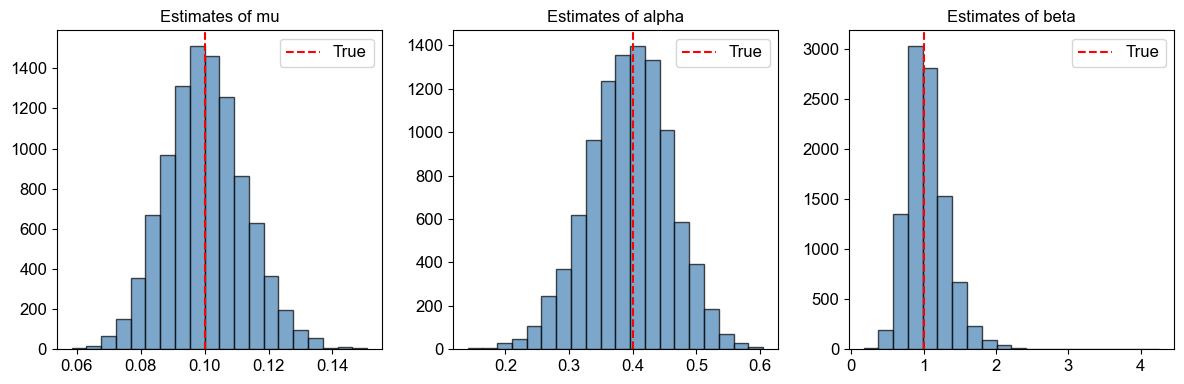

In [49]:
if __name__ == "__main__":
    df = test_mle_statistics(
        true_para={"mu": 0.1, "alpha": 0.4, "beta": 1.0},
        itv=[0, 1_000],
        num_runs=10_000,
        verbose=True  # see which runs fail
    )

➤ Bias
All biases are very small (less than 0.05).
Especially for μ and α, the bias is almost negligible — ✅ unbiased MLE behavior.
➤ Variance
Variance is low overall — and that's expected since you used T = 10,000, which gives a lot of data per run.
➤ β is a little noisier
That’s also expected:
The decay parameter β is often harder to estimate precisely.
Still, a std of 0.29 and small bias is a good result.

### For the branching algorithm and how it compares :

In [52]:
def test_mle_on_branching_simulator(
    true_para={"mu": 0.2, "alpha": 0.5, "beta": 2.0},
    itv=[0, 100],
    num_runs=100,
    verbose=False
):
    def get_param(x):
        if isinstance(x, (list, np.ndarray)):
            return x[0]
        return x

    # Define kernel
    alpha = true_para["alpha"]
    beta = true_para["beta"]
    nu = lambda t: alpha * beta * np.exp(-beta * t)
    nu_max = alpha * beta
    mu = true_para["mu"]

    estimates = []

    for i in tqdm(range(num_runs), desc="Branching MLE"):
        # Simulate events using your branching process
        events, _ = simulate_hawkes_branching(mu, nu, nu_max, Tmax=itv[1])
        T = events[(events > itv[0]) & (events < itv[1])]

        if len(T) < 5:
            if verbose:
                print(f"Run {i}: too few events ({len(T)}), skipped.")
            continue

        h2 = hk.estimator().set_kernel('exp').set_baseline('const')
        try:
            h2.fit(T, itv)
            est_para = h2.para
            estimates.append([
                get_param(est_para["mu"]),
                get_param(est_para["alpha"]),
                get_param(est_para["beta"])
            ])
        except Exception as e:
            if verbose:
                print(f"Run {i} failed: {e}")
            continue

    if not estimates:
        print("\n❌ No successful estimations. Try increasing μ or Tmax.")
        return None

    # Analysis
    estimates = np.array(estimates)
    df = pd.DataFrame(estimates, columns=["mu", "alpha", "beta"])

    print(f"\n✅ Successful runs: {len(df)} out of {num_runs}")
    print("True parameters:", true_para)
    print("\nMean estimates:\n", df.mean())
    print("\nStandard deviations:\n", df.std())
    print("\nBias (mean - true):\n", df.mean() - pd.Series(true_para))

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, param in enumerate(["mu", "alpha", "beta"]):
        axs[i].hist(df[param], bins=20, color='orchid', edgecolor='k', alpha=0.7)
        axs[i].axvline(true_para[param], color='red', linestyle='--', label='True')
        axs[i].set_title(f"Estimates of {param}")
        axs[i].legend()
    plt.tight_layout()
    plt.show()

    return df

In [ ]:
df_branching = test_mle_on_branching_simulator(
    true_para={"mu": 0.2, "alpha": 0.5, "beta": 2.0},
    itv=[0, 1000],
    num_runs=1_000,
    verbose=False
)

Branching MLE:   4%|▍         | 38/1000 [00:13<05:33,  2.88it/s]